In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import pandas as pd
from socc_har.data import DataModule
from socc_har.eval import ReportEvaluationModule

data_path = '../data'
out_path='.'
metadata_file=None
num_frames = 32
res = 224
fps=12

dm = DataModule(database='socc-har-32-v0.1.1',
                data_dir=data_path, out_dir=out_path,
                num_frames=num_frames,
                res=res, fps=fps,
                #batch_size=multi_clip_test_bs if consensus != 'pool' else single_clip_test_bs,
                max_train_samples_per_class=200,
                metadata_path=metadata_file,
                #test_duration=test_clip_duration,
                #num_test_crops=num_test_crops if consensus != 'pool' else 1,
                #num_test_frames=num_test_frames if consensus == 'pool' else None
                )

db = dm.database

In [35]:
metric_type = 'macro'
title = 'R2plus1D'
#title = 'SlowFast'

In [36]:
max_eval = ReportEvaluationModule('.', dm, pd.read_csv(f'./consensus/{title}/max/report (15).csv'), None, ['png', 'eps'])
pool_eval = ReportEvaluationModule('.', dm, pd.read_csv(f'./consensus/{title}/pool/report (15).csv'), None, ['png', 'eps'])
avg_eval = ReportEvaluationModule('.', dm, pd.read_csv(f'./consensus/{title}/avg/report (15).csv'), None, ['png', 'eps'])

In [37]:
_, max_v = max_eval.get_scalars(False)
max_v = max_v['test']
_, pool_v = pool_eval.get_scalars(False)
pool_v = pool_v['test']
_, avg_v = avg_eval.get_scalars(False)
avg_v = avg_v['test']

[0.820761264634526, 0.5542123913764954, 0.969223916530609, 0.139689102768898, 0.2894078493118286, 0.11147931218147278]
      AUROC  Balanced Accuracy        F1  Precision    Recall
0  0.820761           0.554212  0.139689   0.289408  0.111479
1  0.638440           0.509734  0.012923   0.047793  0.021172
2  0.637479           0.501238  0.003753   0.015577  0.002593
3  0.627968           0.500854  0.002982   0.014262  0.001794
      AUROC  Balanced Accuracy        F1  Precision    Recall
0  1.000000           1.000000  1.000000   1.000000  1.000000
1  0.777863           0.919745  0.092515   0.165141  0.189921
2  0.776692           0.904415  0.026865   0.053824  0.023260
3  0.765105           0.903722  0.021344   0.049281  0.016097


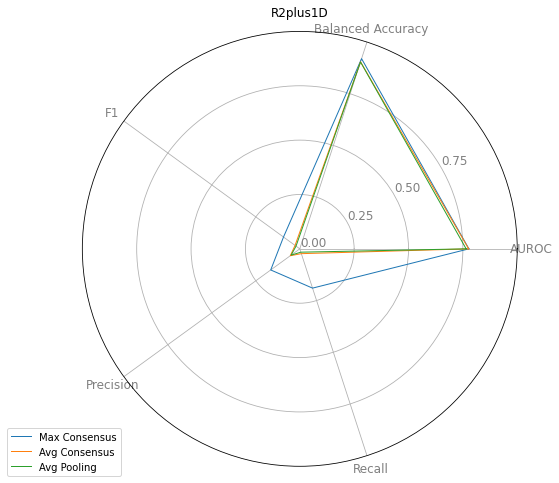

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

types = dict(micro=0, macro=1, weighted=2)

metric_type = types[metric_type]


val_metrics = dict(
    R2plus1D=[0.820761264634526, 0.5542123913764954, 0.969223916530609, 0.139689102768898, 0.2894078493118286, 0.11147931218147278],
    #macro
    SlowFast=[0.847626380698395, 0.5877621173858643, 0.968398928642273, 0.222435057163238, 0.3537039756774902, 0.18096193671226501]
    #weighted
    #SlowFast=[0.8463140427546328, 0.6019644737243652, 0.27792912721633, 0.413760304450988, 0.3537039756774902, 0.20923912525177002]
)
val_metrics = val_metrics[title]
print(val_metrics)

df = pd.DataFrame({
                    "AUROC": [val_metrics[0], max_v[3*5+metric_type], avg_v[3*5+metric_type], pool_v[3*5+metric_type]],
                    "Balanced Accuracy": [val_metrics[1], max_v[3*0+metric_type], avg_v[3*0+metric_type], pool_v[3*0+metric_type]],
                    #"accuracy": [val_metrics[2], max_v[3*1+metric_type], avg_v[3*1+metric_type], pool_v[3*1+metric_type]],
                    "F1": [val_metrics[3], max_v[3*2+metric_type], avg_v[3*2+metric_type], pool_v[3*2+metric_type]],
                    "Precision": [val_metrics[4], max_v[3*3+metric_type], avg_v[3*3+metric_type], pool_v[3*3+metric_type]],
                    "Recall": [val_metrics[5], max_v[3*4+metric_type], avg_v[3*4+metric_type], pool_v[3*4+metric_type]],
                   })
print(df)
df=(df)/df.max()
#df=(df-df.min())/(df.max()-df.min())
labels = ["VAL", "Max Consensus", "Avg Consensus", "Avg Pooling"]
print(df)


import numpy as np
import matplotlib.pyplot as plt
from math import pi


# obtain df information
categories = list(df)
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# define plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                        subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(0, 1, 0.25),
           color='grey', size=12)
plt.ylim(0, 1)
ax.set_rlabel_position(30)

# draw radar-chart:
for i in range(1, len(df)):
    val_c1 = df.loc[i].values.flatten().tolist()
    val_c1 += val_c1[:1]
    ax.plot(angles, val_c1, linewidth=1, linestyle='solid',
            label=labels[i])
    #ax.fill(angles, val_c1, alpha=0.4)

# add legent and show plot
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title(title)
plt.show()

In [40]:
fig.savefig(f'/Users/simonnarendorf/Documents/Projects/soccer-action-classification/Thesis/img/07_consensus_{title}.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
